# XGBoost

Algorithm to train and build the XGBboost model to determine how well this model performs on the train dataset

In [24]:
import pandas as pd

train_data = pd.read_csv('../Datasets/oneHotEncoded_dataset.csv')
train_data['AgeuponOutcome'].fillna(-1, inplace=True)

y = train_data.OutcomeType
train_data = train_data.drop(['OutcomeType'], axis = 1)
X = train_data

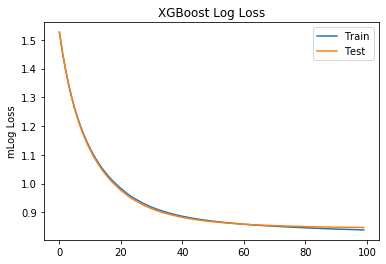

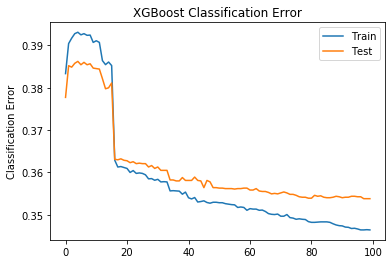

Recall: 0.65%
Precision: 0.64%


In [55]:
# Used to determine the amount of iterations the model should do, based on the learning curve. When the learning curve
# stabalizes, the learning should stop, because continue learning doesn't increase the accuracy but takes a lot of time

import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score
from matplotlib import pyplot

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = XGBClassifier()
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["merror", "mlogloss"]

model.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose = False)
predictions = model.predict(X_test)

recall = recall_score(y_test, predictions, average = 'weighted')
precision = precision_score(y_test, predictions, average = 'weighted')

results = model.evals_result()
epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
pyplot.ylabel('mLog Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()

fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

print("Recall: %.2f%%" % (recall))
print("Precision: %.2f%%" % (precision))

In [ ]:
# Needs to be used to tune the parameters. However, because of the size of the dateset, this takes ages.
# Therefore, the parameters are tunes manually

from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score
from matplotlib import pyplot

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf = xgb.XGBClassifier()
parameters = {
     "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
     }

grid = GridSearchCV(clf,
                    parameters, n_jobs=4,
                    scoring="neg_log_loss",
                    cv=3)

grid.fit(X, y)
model.dump_model('dump.raw.txt')

In [22]:
# Fitting the model

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = XGBClassifier(
    learning_rate = 0.03,
    n_estimators = 500,
    max_depth = 6,
    gamma = 0.3,
    subsample = 0.8,
    colsample_bytree = 0.8,
    objective = 'multi:softprob',
    nthread = 4,
    seed = 43)

model.fit(X_train, y_train)
predictions = model.predict(X_test)

recall = recall_score(y_test, predictions, average = 'weighted')
precision = precision_score(y_test, predictions, average = 'weighted')

In [34]:
# Calculations for the precision, recall and accuracy

y_class0 = y_test[y_test == 0]
y_class1 = y_test[y_test == 1]
y_class2 = y_test[y_test == 2]
y_class3 = y_test[y_test == 3]
y_class4 = y_test[y_test == 4]

prediction_class0 = predictions[y_test == 0]
prediction_class1 = predictions[y_test == 1]
prediction_class2 = predictions[y_test == 2]
prediction_class3 = predictions[y_test == 3]
prediction_class4 = predictions[y_test == 4]

# precision calculations
precision_class0 = precision_score(y_class0,prediction_class0, average = 'weighted')
precision_class1 = precision_score(y_class1,prediction_class1, average = 'weighted')
precision_class2 = precision_score(y_class2,prediction_class2, average = 'weighted')
precision_class3 = precision_score(y_class3,prediction_class3, average = 'weighted')
precision_class4 = precision_score(y_class4,prediction_class4, average = 'weighted')

# recall calculations    
recall_class0 = recall_score(y_class0,prediction_class0, average = 'weighted')
recall_class1 = recall_score(y_class1,prediction_class1, average = 'weighted')
recall_class2 = recall_score(y_class2,prediction_class2, average = 'weighted')
recall_class3 = recall_score(y_class3,prediction_class3, average = 'weighted')
recall_class4 = recall_score(y_class4,prediction_class4, average = 'weighted')


# accuracy calculations
accuracy_class0 = accuracy_score(y_class0,prediction_class0)
accuracy_class1 = accuracy_score(y_class1,prediction_class1)
accuracy_class2 = accuracy_score(y_class2,prediction_class2)
accuracy_class3 = accuracy_score(y_class3,prediction_class3)
accuracy_class4 = accuracy_score(y_class4,prediction_class4)

accuracy = accuracy_score(y_test, predictions)
print('Class zero has presicion of {0}, recall of {1} and accuracy of {2}'.format(precision_class0,recall_class0,accuracy_class0))
print('Class one has presicion of {0}, recall of {1} and accuracy of {2}'.format(precision_class1,recall_class1,accuracy_class1))
print('Class two has presicion of {0}, recall of {1} and accuracy of {2}'.format(precision_class2,recall_class2,accuracy_class2))
print('Class three has presicion of {0}, recall of {1} and accuracy of {2}'.format(precision_class3,recall_class3,accuracy_class3))
print('Class four has presicion of {0}, recall of {1} and accuracy of {2}'.format(precision_class4,recall_class4,accuracy_class4))
print('The overall precision is {0} and the overall recall is {1} and accuracy {2}'.format(precision,recall, accuracy))

Class zero has presicion of 1.0, recall of 0.8487559407324574 and accuracy of 0.8487559407324574
Class one has presicion of 0.0, recall of 0.0 and accuracy of 0.0
Class two has presicion of 1.0, recall of 0.1422924901185771 and accuracy of 0.1422924901185771
Class three has presicion of 1.0, recall of 0.42612555485098286 and accuracy of 0.42612555485098286
Class four has presicion of 1.0, recall of 0.6331723027375201 and accuracy of 0.6331723027375201
The overall precision is 0.6455874194842217 and the overall recall is 0.6514000680194989 and accuracy 0.6514000680194989
